In [ ]:
import numpy as np
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

#Week 10 Lecture 1:  Singular Value Decomposition

Suppose we have a rectangular matrix, which of course won't have eigenvalues.  Is there an analog to eigenvalues for rectangular matrices?  Consider the eigenvalues of $A^TA$ and $AA^T$.  These will be called Singular Values.

In [ ]:
A = np.random.randn(20,10)
U, S, V = np.linalg.svd(A, full_matrices = False)
print(np.linalg.norm(U@np.diag(S)@V - A))

2.846416008339986e-14


## Using SVD for image compression
Consider the following image of the vessels in the heart

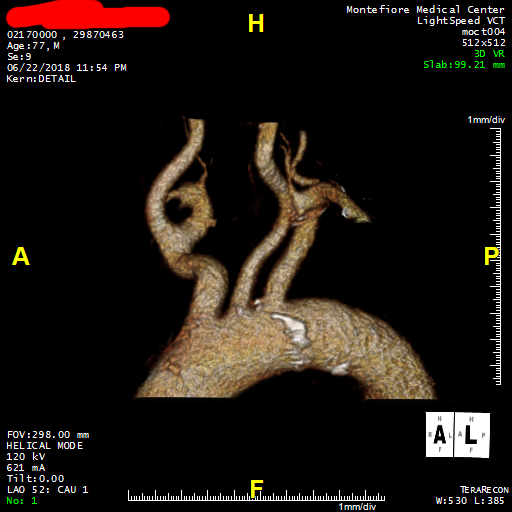

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving image.png to image.png


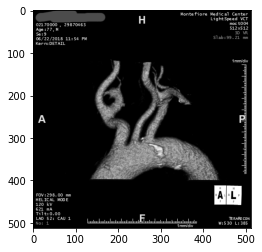

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

A = mpimg.imread('image.png')     
A = rgb2gray(img)*255    ### To make it compatible with MATLAB
plt.imshow(A/255, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [ ]:
U, S, V = np.linalg.svd(A, full_matrices = False)
print(S[0:5])

[19456.33010241 13042.18315854  7280.22037666  6952.97798946
  6416.41391252]


If we reconstruct the image using only the first singular value, we see that it's pretty bad.

Compression ratio =  0.003910064697265625


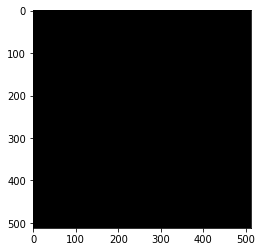

In [ ]:
k = 1
S = np.diag(S)
m, n = A.shape
B = U[:, 0:k-1]@S[0:k-1,0:k-1]@V[0:k-1, :]
plt.imshow(B/255, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
print('Compression ratio = ', (m*k+k+n*k)/(m*n))

This required less then 1% of the storage required to store the full matrix.

Next, we look at the size of the singular values, relative to the top singular value:

In [ ]:
DiagS = np.diag(S)

for i in range(len(DiagS)):
  if DiagS[i]/DiagS[0] < 0.05:
    print(i)
    break

54


The 55th singular value is less than 5% of the magnitude of the top singular value. So, we will chop there and see what image we reconstruct.

Compression ratio =  0.21505355834960938


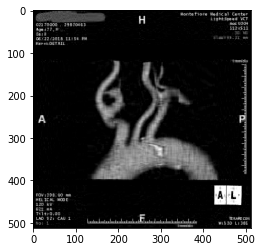

In [ ]:
k = i+1
S = np.diag(S)
m, n = A.shape
B = U[:, 0:k-1]@S[0:k-1,0:k-1]@V[0:k-1, :]
plt.imshow(B/255, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
print('Compression ratio = ', (m*k+k+n*k)/(m*n))

With just over 20% of the storage, we can compress the image so that it is at least recognizable. There are some issues that affect the true amount of storage. These are related to the fact that the original image was an integer matrix and $U,V,S$ are now double precision numbers. Whether justified, or not, we ignore that here for simplicity.